### Imports
In this project, we will use standard libraries for machine learning.

In [25]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_predict
# Machine Learning Models


#import sklearn dependencies
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
    
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')    

### Data upload.
First we load the set of descriptors.

In [15]:
# Read in data into dataframes 
path = 'Datasets/3_103/'
features = pd.read_excel(path+'output.xlsx')
labels = pd.read_csv(path+'ld50.csv')

# Display sizes of data
print('Feature Size: ', features.shape)
print('Labels Size:  ', labels.shape)


Feature Size:  (103, 1885)
Labels Size:   (103, 1)


<AxesSubplot:xlabel='Синиш кўрсатгичи', ylabel='Density'>

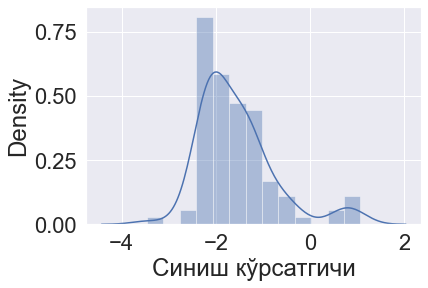

In [16]:
y = np.log10(1/labels)
sns.distplot(y, axlabel = 'Синиш кўрсатгичи')


In [17]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(features)

# Transform both the training and testing data
X_new = scaler.transform(features)
y_train = np.array(y).reshape((-1, ))

Сhemical descriptors were normalized to take values between 0 and 1.Constant and near constant variables were removed; and, if two or more variables were highly 
correlated (correlation coeﬃcient above 0.9), only one of them was chosen randomly.



In [18]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
            
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)    
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)             
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops) 
               
    return x

In [19]:
X_train = remove_collinear_features(features, 0.9)

In [20]:

print(X_train.shape)
print(y.shape)


(103, 355)
(103, 1)



Dimension reduction process



In [21]:
from rfpimp import *
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.20)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train1, y_train1)

imp = importances(rf, X_test1, y_test1) # permutation

#viz = plot_importances(imp)
#viz.view()

In [22]:
column = imp.Importance.iloc[1:10].index
X_train_feature = X_train.get(column)

In [23]:
def models(x,y):
    #creating model object
    seed = 2; n_jobs_param = -1;
    lr = LinearRegression(n_jobs=n_jobs_param)
    lasso = Lasso(random_state=seed)
    ridge = Ridge(random_state=seed)
    en = ElasticNet(random_state=seed)    
    llar = LassoLars()
    omp = OrthogonalMatchingPursuit()
    br = BayesianRidge()
    ard = ARDRegression()
    par = PassiveAggressiveRegressor(random_state=seed)
    tr = TheilSenRegressor(random_state=seed, n_jobs=n_jobs_param)
    huber = HuberRegressor()   
    kr = KernelRidge()
    svm = SVR()
    knn = KNeighborsRegressor(n_jobs=n_jobs_param)
    dt = DecisionTreeRegressor(random_state=seed)
    rf = RandomForestRegressor(random_state=seed, n_jobs=n_jobs_param)
    et = ExtraTreesRegressor(random_state=seed, n_jobs=n_jobs_param)
    ada = AdaBoostRegressor(random_state=seed)
    gbr = GradientBoostingRegressor(random_state=seed)
    mlp = MLPRegressor(random_state=seed)
    
    
    estimators = {
              'Lasso Regression' : lasso, 
              'Ridge Regression' : ridge, 
              'Elastic Net' : en,             
              'Lasso Least Angle Regression' : llar, 
              'Orthogonal Matching Pursuit' : omp, 
              'Bayesian Ridge' : br, 
              'Automatic Relevance Determination' : ard,
              'Passive Aggressive Regressor' : par,               
              'TheilSen Regressor' : tr, 
              'Huber Regressor' : huber, 
              'Kernel Ridge' : kr,
              'Support Vector Machine' : svm, 
              'K Neighbors Regressor' : knn, 
              'Decision Tree' : dt, 
              'Random Forest' : rf, 
              'Extra Trees Regressor' : et,
              'AdaBoost Regressor' : ada,
              'Gradient Boosting Regressor' : gbr, 
              'Multi Level Perceptron' : mlp
             
             }
    result =pd.DataFrame()
    for name, estimator in estimators.items():    
        bgg_model = BaggingRegressor(estimator, random_state=seed).fit(X_new, y)
        ada_model = AdaBoostRegressor(estimator, random_state=seed).fit(X_new, y)
        
        i =0
        for model in [estimator,bgg_model,ada_model]:
            i=i+1
            score = cross_validate(model, x, y,
                                   scoring=['neg_root_mean_squared_error'],
                                   n_jobs=-1, verbose=0)
            if i==1:
                data = {'model':[name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
            if i==2:
                data = {'model':['BG-'+name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
            if i==3:
                data = {'model':['AR-'+name], 'RMSE':[-np.mean(score['test_neg_root_mean_squared_error'])],}                
        
            result = pd.concat([result,pd.DataFrame(data)],axis=0,ignore_index=True)           
    
    return result


In [26]:
results = pd.DataFrame()
for train in [[X_train,y_train],[X_train_feature,y_train]]:
    result = models(x=train[0],y=train[1])
    results_sing = result.sort_values('RMSE', ascending = True)
    result['sort']=0
    result['sort'].iloc[results_sing.index.values] = list(range(len(result.index)))
    results = pd.concat([results,result],axis=1)

In [29]:
results.to_excel(path+'result_103.xlsx', index = True) 

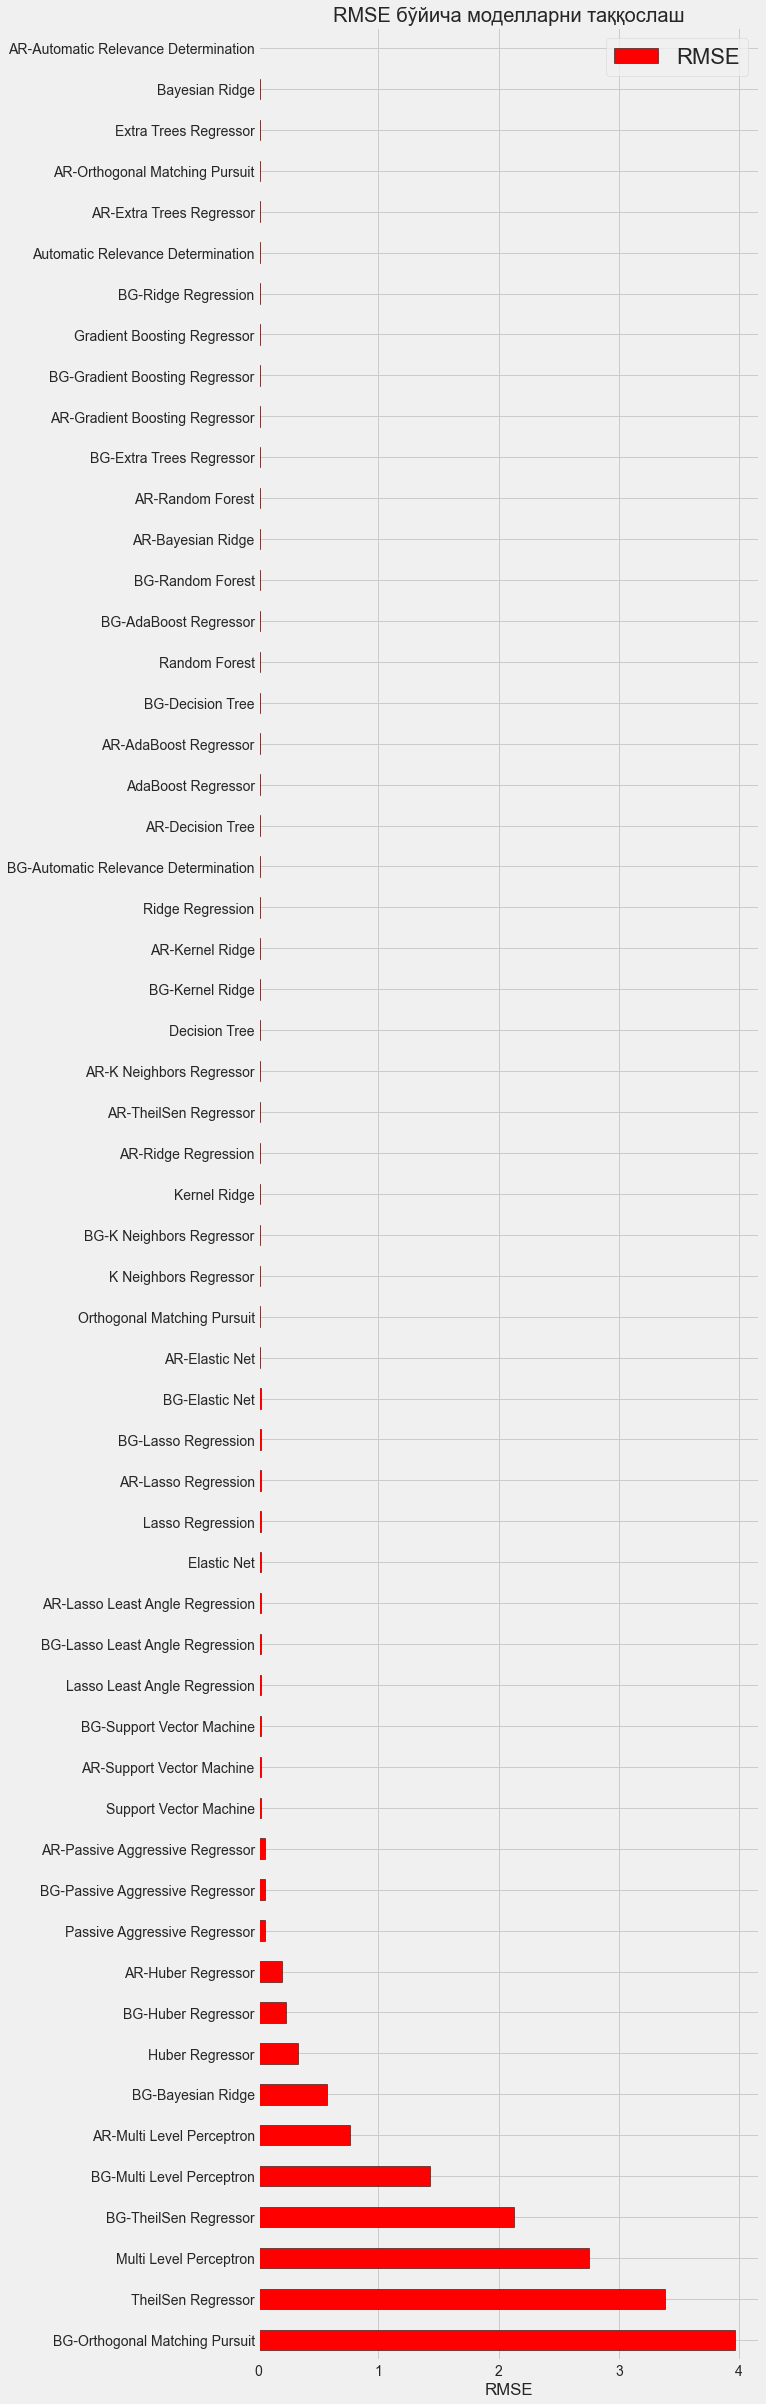

In [45]:
plt.style.use('fivethirtyeight')
figsize(8, 40)
# Horizontal bar chart of test mae
result.sort_values('RMSE', ascending = False).plot(x = 'model', y = 'RMSE', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 14)
plt.title('RMSE бўйича моделларни таққослаш', size = 20);